## DS4002 Project 3 – Facial Recognition: Accuracy by Age, Gender, and Race

Install DeepFace package

In [211]:
pip install deepface


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Install TF-Keras API

In [212]:
pip install tf-keras


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Import necessary packages

In [213]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import walk
from PIL import Image
import cv2
from deepface import DeepFace

Get the path to the folder/directory containing the images files and get a list of all the image file names. For privacy purposes, our path has been removed from the code block.

In [214]:
path = "put path to the directory containing the images here"
dir_list = os.listdir(path)

Create empty lists that will later contain all the ages, genders, races, and dates among the images

In [215]:
ages = []
genders = []
races = []
datetime = []

There are 10,137 images

In [216]:
print(len(dir_list))

10137


Sample of the file naming format. Check out the data dictionary for its breakdown and explanation

In [217]:
print(dir_list[0])

16_1_3_20170104222158160.jpg


This block of code makes sure every filename contains the necessary information and if so, adds it to the aforementioned lists. Discards if it does not

In [218]:
not_four = []

for image in dir_list:
    x = image.split("_")
    if len(x) == 4:
        ages.append(x[0])
        genders.append(x[1])
        races.append(x[2])
        datetime.append(x[3])
    if len(x) != 4:
        not_four.append(image)

for image in not_four:
    dir_list.remove(image)

There were only two filenames without all the necessary information

In [219]:
total = len(dir_list)
print(total)

10135


In [220]:
print(len(ages))
print(len(genders))
print(len(races))

10135
10135
10135


Convert ages and races from string to int format for plotting purposes

In [221]:
ages = list(map(int, ages))
races = list(map(int, races))

Plot the breakdown and distribution of ages, genders, and races among all 10,135 images

Text(0.5, 1.0, 'Distribution of Faces by Age')

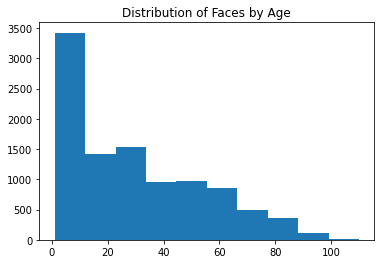

In [222]:
plt.hist(ages)
plt.xticks(np.arange(0, 120, 20)) 
plt.title("Distribution of Faces by Age")

Text(0.5, 1.0, 'Distribution of Faces by Gender')

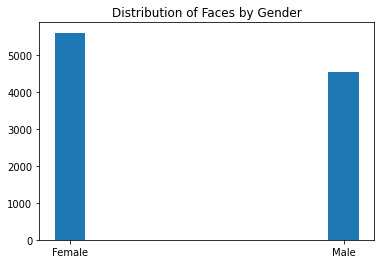

In [223]:
plt.hist(genders)
plt.xticks([0.05, 0.95], ['Female', 'Male'])
plt.title("Distribution of Faces by Gender")

Text(0.5, 1.0, 'Distribution of Faces by Race')

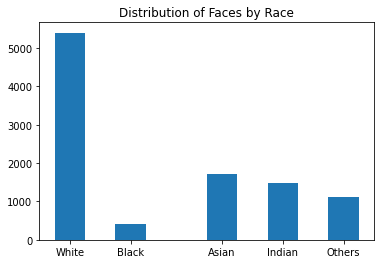

In [224]:
plt.hist(races)
plt.xticks([0.2, 1, 2.2, 3, 3.8], ['White', 'Black', 'Asian', 'Indian', 'Others']) 
plt.title("Distribution of Faces by Race")

Sample of displaying an image to make sure they can be processed properly

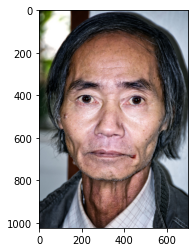

In [225]:
image_path = 'face_images/66_0_2_20170111205753656.jpg'

img = cv2.imread(image_path)

plt.imshow(img[:,:,::-1]) 
plt.show()

Run DeepFace on the above image to see its predictions on the subject's age, gender, and race

In [226]:
age = DeepFace.analyze(img,actions=['age'])
gender = DeepFace.analyze(img,actions=['gender'])
race = DeepFace.analyze(img,actions=['race'])

print('age: ', age)
print('gender: ', gender)
print('race: ', race)

age:  [{'age': 30, 'region': {'x': 60, 'y': 202, 'w': 551, 'h': 551, 'left_eye': (217, 418), 'right_eye': (453, 424)}, 'face_confidence': 0.9}]
gender:  [{'gender': {'Woman': 0.03515808784868568, 'Man': 99.96484518051147}, 'dominant_gender': 'Man', 'region': {'x': 60, 'y': 202, 'w': 551, 'h': 551, 'left_eye': (217, 418), 'right_eye': (453, 424)}, 'face_confidence': 0.9}]
race:  [{'race': {'asian': 96.25058747831508, 'indian': 0.9754920959765968, 'black': 0.11237384257086173, 'white': 0.03940621043741467, 'middle eastern': 0.0021341307182068617, 'latino hispanic': 2.6200124692924303}, 'dominant_race': 'asian', 'region': {'x': 60, 'y': 202, 'w': 551, 'h': 551, 'left_eye': (217, 418), 'right_eye': (453, 424)}, 'face_confidence': 0.9}]


Create variables to be used for the overall accuracy of each category

In [228]:
overall_age_accuracy = 0
overall_gender_accuracy = 0
overall_race_accuracy = 0

Once again, create empty lists and repeat the same process onwards, just for the randomized sample of 1,000 images instead of all of them

In [229]:
ages_1000 = []
genders_1000 = []
races_1000 = []
datetime_1000 = []

Get the first 1,000 images (which are random and follow a fairly similar distribution to entire dataset as shown below)

In [230]:
first_1000_items = dir_list[:1000]

In [231]:
for image in first_1000_items:
    x = image.split("_")
    if len(x) == 4:
        ages_1000.append(x[0])
        genders_1000.append(x[1])
        races_1000.append(x[2])
        datetime_1000.append(x[3])

In [232]:
ages_1000 = list(map(int, ages_1000))
races_1000 = list(map(int, races_1000))

Text(0.5, 1.0, 'Distribution of Faces by Age: First 1000')

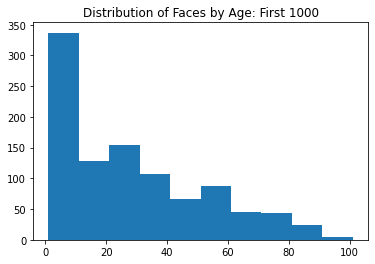

In [233]:
plt.hist(ages_1000)
plt.xticks(np.arange(0, 120, 20)) 
plt.title("Distribution of Faces by Age: First 1000")

Text(0.5, 1.0, 'Distribution of Faces by Gender: First 1000')

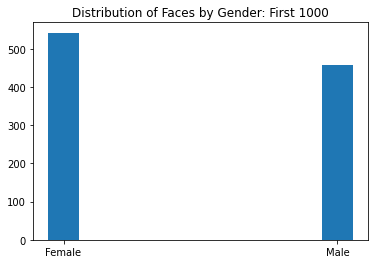

In [234]:
plt.hist(genders_1000)
plt.xticks([0.05, 0.95], ['Female', 'Male'])
plt.title("Distribution of Faces by Gender: First 1000")

Text(0.5, 1.0, 'Distribution of Faces by Race: First 1000')

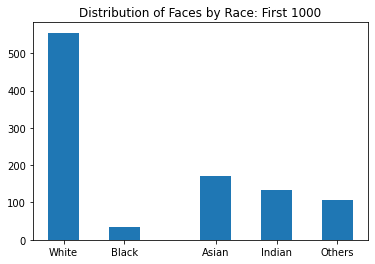

In [235]:
plt.hist(races_1000)
plt.xticks([0.2, 1, 2.2, 3, 3.8], ['White', 'Black', 'Asian', 'Indian', 'Others']) 
plt.title("Distribution of Faces by Race: First 1000")

Create variables to be used to determine the accuracy of the model on each age group

In [236]:
age_0_10_acc = 0
age_0_10_total = 0

age_11_20_acc = 0
age_11_20_total = 0

age_21_30_acc = 0
age_21_30_total = 0

age_31_40_acc = 0
age_31_40_total = 0

age_41_50_acc = 0
age_41_50_total = 0

age_51_60_acc = 0
age_51_60_total = 0

age_61_70_acc = 0
age_61_70_total = 0

age_71_80_acc = 0
age_71_80_total = 0

age_81_90_acc = 0
age_81_90_total = 0

age_91_100_acc = 0
age_91_100_total = 0

Create variables to be used to determine the accuracy of the model on each gender

In [237]:
male_acc = 0
male_total = 0

female_acc = 0
female_total = 0

Create variables to be used to determine the accuracy of the model on each race

In [238]:
white_acc = 0
white_total = 0

black_acc = 0
black_total = 0

asian_acc = 0
asian_total = 0

indian_acc = 0
indian_total = 0

other_acc = 0
other_total = 0

Perform the analysis. This is an incredibly long process that can take upwards of 20 minutes for 1,000 images. As the analysis occurs, the accuracies are being tracked.

In [239]:
for image in first_1000_items:
    image_path = f'face_images/{image}'

    x = image.split("_")

    age = x[0]
    gender = x[1]
    race = x[2]

    # print(age)
    # print(gender)
    # print(race)

    img = cv2.imread(image_path)

    # plt.imshow(img[:,:,::-1]) 
    # plt.show()

    analysis_age = DeepFace.analyze(img,actions=['age'], enforce_detection=False)
    analysis_gender = DeepFace.analyze(img,actions=['gender'], enforce_detection=False)
    analysis_race = DeepFace.analyze(img,actions=['race'], enforce_detection=False)

    if len(analysis_age) == 0 or len(analysis_gender) == 0 or len(analysis_race) == 0:
        continue

    # print(analysis_age)
    # print(analysis_gender)
    # print(analysis_race)

    age_guess = analysis_age[0]['age']
    gender_guess = analysis_gender[0]['dominant_gender']
    race_guess = analysis_race[0]['dominant_race']

    if gender_guess == 'Woman':
        gender_guess = 1

    if gender_guess == 'Man':
        gender_guess = 0

    if race_guess == 'white':
        race_guess = 0

    if race_guess == 'black':
        race_guess = 1

    if race_guess == 'asian':
        race_guess = 2

    if race_guess == 'indian':
        race_guess = 3

    if race_guess == 'latino hispanic' or race_guess == 'middle eastern':
        race_guess = 4

    # print(age_guess)
    # print(gender_guess)
    # print(race_guess)

    if abs(int(age) - int(age_guess)) <= 5:
        overall_age_accuracy =  overall_age_accuracy+1

        if int(age) >= 0 and int(age) <= 10:
            age_0_10_acc = age_0_10_acc + 1

        if int(age) >= 11 and int(age) <= 20:
            age_11_20_acc = age_11_20_acc + 1

        if int(age) >= 21 and int(age) <= 30:
            age_21_30_acc = age_21_30_acc + 1

        if int(age) >= 31 and int(age) <= 40:
            age_31_40_acc = age_31_40_acc + 1

        if int(age) >= 41 and int(age) <= 50:
            age_41_50_acc = age_41_50_acc + 1

        if int(age) >= 51 and int(age) <= 60:
            age_51_60_acc = age_51_60_acc + 1

        if int(age) >= 61 and int(age) <= 70:
            age_61_70_acc = age_61_70_acc + 1

        if int(age) >= 71 and int(age) <= 80:
            age_71_80_acc = age_71_80_acc + 1

        if int(age) >= 81 and int(age) <= 90:
            age_81_90_acc = age_81_90_acc + 1

        if int(age) >= 91 and int(age) <= 100:
            age_91_100_acc = age_91_100_acc + 1

    if int(gender) == gender_guess:
        overall_gender_accuracy = overall_gender_accuracy + 1

        if int(gender) == 1:
            female_acc = female_acc + 1

        if int(gender) == 0:
            male_acc = male_acc + 1

    if int(race) == race_guess:
        overall_race_accuracy = overall_race_accuracy + 1

        if int(race) == 0:
            white_acc = white_acc + 1

        if int(race) == 1:
            black_acc = black_acc + 1

        if int(race) == 2:
            asian_acc = asian_acc + 1

        if int(race) == 3:
            indian_acc = indian_acc + 1

        if int(race) == 4:
            other_acc = other_acc + 1

    if int(age) >= 0 and int(age) <= 10:
        age_0_10_total = age_0_10_total + 1

    if int(age) >= 11 and int(age) <= 20:
        age_11_20_total = age_11_20_total + 1

    if int(age) >= 21 and int(age) <= 30:
        age_21_30_total = age_21_30_total + 1

    if int(age) >= 31 and int(age) <= 40:
        age_31_40_total = age_31_40_total + 1

    if int(age) >= 41 and int(age) <= 50:
        age_41_50_total = age_41_50_total + 1

    if int(age) >= 51 and int(age) <= 60:
        age_51_60_total = age_51_60_total + 1

    if int(age) >= 61 and int(age) <= 70:
        age_61_70_total = age_61_70_total + 1

    if int(age) >= 71 and int(age) <= 80:
        age_71_80_total = age_71_80_total + 1

    if int(age) >= 81 and int(age) <= 90:
        age_81_90_total = age_81_90_total + 1

    if int(age) >= 91 and int(age) <= 100:
        age_91_100_total = age_91_100_total + 1  

    if int(gender) == 1:
        female_total = female_total + 1

    if int(gender) == 0:
        male_total = male_total + 1

    if int(race) == 0:
        white_total = white_total + 1

    if int(race) == 1:
        black_total = black_total + 1

    if int(race) == 2:
        asian_total = asian_total + 1

    if int(race) == 3:
        indian_total = indian_total + 1

    if int(race) == 4:
        other_total = other_total + 1


Print and plot the overall accuracies

In [258]:
print(f"Overall accuracy of detecing age: {overall_age_accuracy/len(first_1000_items)}")
print(f"Overall accuracy of detecing gender: {overall_gender_accuracy/len(first_1000_items)}")
print(f"Overall accuracy of detecing race: {overall_race_accuracy/len(first_1000_items)}")

Overall accuracy of detecing age: 0.199
Overall accuracy of detecing gender: 0.71
Overall accuracy of detecing race: 0.691


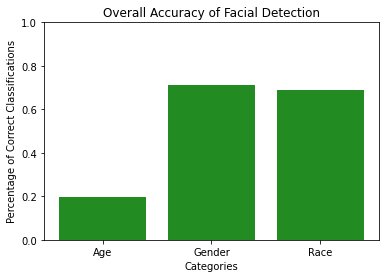

In [259]:
x_values = ["Age", "Gender", "Race"]
y_values = [overall_age_accuracy/len(first_1000_items), overall_gender_accuracy/len(first_1000_items), overall_race_accuracy/len(first_1000_items)]

plt.ylim(0, 1)

plt.bar(x_values, y_values, color='forestgreen')

plt.xlabel('Categories')
plt.ylabel('Percentage of Correct Classifications')
plt.title('Overall Accuracy of Facial Detection')

plt.show()

Print and plot the accuracies for each age group

In [244]:
print(f"Accuracy of detecing 0-10 age group: {age_0_10_acc/age_0_10_total}")
print(f"Accuracy of detecing 11-20 age group: {age_11_20_acc/age_11_20_total}")
print(f"Accuracy of detecing 21-30 age group: {age_21_30_acc/age_21_30_total}")
print(f"Accuracy of detecing 31-40 age group: {age_31_40_acc/age_31_40_total}")
print(f"Accuracy of detecing 41-50 age group: {age_41_50_acc/age_41_50_total}")
print(f"Accuracy of detecing 51-60 age group: {age_51_60_acc/age_51_60_total}")
print(f"Accuracy of detecing 61-70 age group: {age_61_70_acc/age_61_70_total}")
print(f"Accuracy of detecing 71-80 age group: {age_71_80_acc/age_71_80_total}")
print(f"Accuracy of detecing 81-90 age group: {age_81_90_acc/age_81_90_total}")
print(f"Accuracy of detecing 91-100 age group: {age_91_100_acc/age_91_100_total}")

Accuracy of detecing 0-10 age group: 0.0029850746268656717
Accuracy of detecing 11-20 age group: 0.1349206349206349
Accuracy of detecing 21-30 age group: 0.6493506493506493
Accuracy of detecing 31-40 age group: 0.5514018691588785
Accuracy of detecing 41-50 age group: 0.25757575757575757
Accuracy of detecing 51-60 age group: 0.056818181818181816
Accuracy of detecing 61-70 age group: 0.0
Accuracy of detecing 71-80 age group: 0.0
Accuracy of detecing 81-90 age group: 0.0
Accuracy of detecing 91-100 age group: 0.0


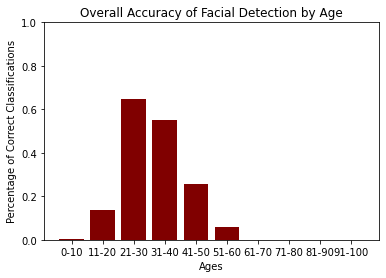

In [252]:
x_values = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]
y_values = [age_0_10_acc/age_0_10_total, age_11_20_acc/age_11_20_total, age_21_30_acc/age_21_30_total, age_31_40_acc/age_31_40_total, age_41_50_acc/age_41_50_total, age_51_60_acc/age_51_60_total, age_61_70_acc/age_61_70_total, age_71_80_acc/age_71_80_total, age_81_90_acc/age_81_90_total, age_91_100_acc/age_91_100_total]

plt.ylim(0, 1)

plt.bar(x_values, y_values, color='maroon')

plt.xlabel('Ages')
plt.ylabel('Percentage of Correct Classifications')
plt.title('Overall Accuracy of Facial Detection by Age')

plt.show()

Print and plot the accuracies for each gender

In [242]:
print(f"Accuracy of detecing males: {male_acc/male_total}")
print(f"Accuracy of detecing females: {female_acc/female_total}")

Accuracy of detecing males: 0.8810572687224669
Accuracy of detecing females: 0.575139146567718


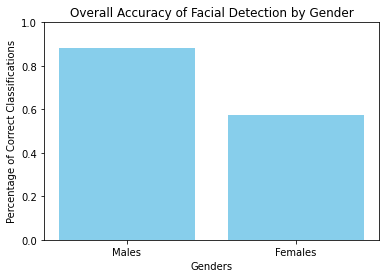

In [251]:
x_values = ["Males", "Females"]
y_values = [male_acc/male_total, female_acc/female_total]

plt.ylim(0, 1)

plt.bar(x_values, y_values, color='skyblue')

plt.xlabel('Genders')
plt.ylabel('Percentage of Correct Classifications')
plt.title('Overall Accuracy of Facial Detection by Gender')

plt.show()

Print and plot the accuracies for each race

In [243]:
print(f"Accuracy of detecing White people: {white_acc/white_total}")
print(f"Accuracy of detecing Black people: {black_acc/black_total}")
print(f"Accuracy of detecing Asian people: {asian_acc/asian_total}")
print(f"Accuracy of detecing Indian people: {indian_acc/indian_total}")
print(f"Accuracy of detecing other racial groups: {other_acc/other_total}")


Accuracy of detecing White people: 0.8090909090909091
Accuracy of detecing Black people: 0.7058823529411765
Accuracy of detecing Asian people: 0.7719298245614035
Accuracy of detecing Indian people: 0.31343283582089554
Accuracy of detecing other racial groups: 0.46153846153846156


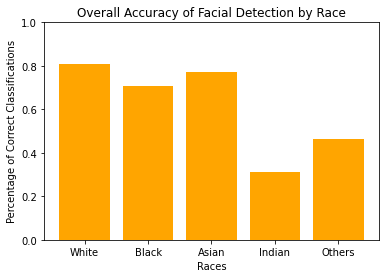

In [256]:
x_values = ["White", "Black", "Asian", "Indian", "Others"]
y_values = [white_acc/white_total, black_acc/black_total, asian_acc/asian_total, indian_acc/indian_total, other_acc/other_total]

plt.ylim(0, 1)

plt.bar(x_values, y_values, color='orange')

plt.xlabel('Races')
plt.ylabel('Percentage of Correct Classifications')
plt.title('Overall Accuracy of Facial Detection by Race')

plt.show()